* Jonathan Leeper
* Week 10 Final Project - DSC 550

## <center><b>Predicting Box Office Success: Marvel and DC Movies</b></center>

# Milestone 1: Data Selection & EDA

## Narrative

For major film studios such as Marvel and DC, predicting the box office success of upcoming movies is critical for strategic planning, budgeting, marketing, and resource allocation. Accurate predictions can help studios optimize promotional strategies, plan sequels, and make informed financial decisions. This can be helpful for future filmmakers as well as the businesses mentioned in exactly what would be necessary for a successful superhero movie.

By understanding the factors that contribute to a movie's success, these studios can improve their decision-making processes and maximize profitability. The objective of this project is to develop a predictive model that estimates the box office revenue of Marvel and DC movies from 1978 until 2024. This model will consider various features such as budget, release date, distributor, box office gross, critic scores, as well as other variables for evaluation. The goal is to provide actionable insights that can help Marvel and DC studios strategize more effectively for future movie releases. The target variable for the model will be the box office gross worldwide of a movie.

The data for this project has been obtained through Kaggle, with the link listed below, where the included dataset contains attributes for gross income, budget, and other variables that will be helpful in our analysis of this dataset. 

Within this analysis, we can determine what truly can be achieved and can help future filmmakers focusing within the superhero genre make data-driven decisions, while understanding how the industry should be moving towards optimization with their strategies to maximize the profitability of the films. Below are the different graphs that were requested within this document, and they will be labeled with how this can be seen and followed up upon.


Link to dataset: https://www.kaggle.com/datasets/mdtoomey/box-office-of-dc-and-marvel-superhero-movies

## Introducing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dc_marvel_movie_performance.csv')
df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94.0,Male,1978.0,"$1,404,237,104","$257,033,544","$137,500,000",Success
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83.0,Male,1981.0,"$725,336,273","$181,010,842","$135,000,000",Success
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29.0,Male,1983.0,"$245,506,947","$119,310,861","$97,500,000",Flop
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8.0,Female,1984.0,"$41,926,345","$102,642,497","$87,500,000",Flop
4,Howard the Duck,01/08/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13.0,Male,1986.0,"$37,962,774","$37,000,000","$92,500,000",Flop


As you can see, we have 23 data attributes that can be applied for each film. This includes release date, the gross domestic box office for both north america vs other territories, the combined total, the budget, as well as these adjusted for inflation.

**Necessary edits before beginning:**

In [3]:
# Convert the 'U.S. release date' from UK format (DD/MM/YYYY) to US format (MM/DD/YYYY)
df['U.S. release date'] = pd.to_datetime(df['U.S. release date'], format='%d/%m/%Y')

# Format the date to US format
df['U.S. release date'] = df['U.S. release date'].dt.strftime('%m/%d/%Y')

# Convert Budget column to numeric by removing '$' and ',' and converting to float
df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)

# Convert Box office gross Worldwide column to numeric by removing '$' and ',' and converting to float
df['Box office gross Worldwide'] = df['Box office gross Worldwide'].replace('[\$,]', '', regex=True).astype(float)

Within this specific milestone, there were some edits and cleaning necessary for correct evaluation. The release date needed to be converted from UK format, d/m/y to US format, m/d/y. This will be handy for future graphs and analysis.

Also, all units will need to be converted to float for easier viewing within the graphs.

## Graph 1: Plotting the distribution of Budget by Movie

D:\Users\Jonathan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


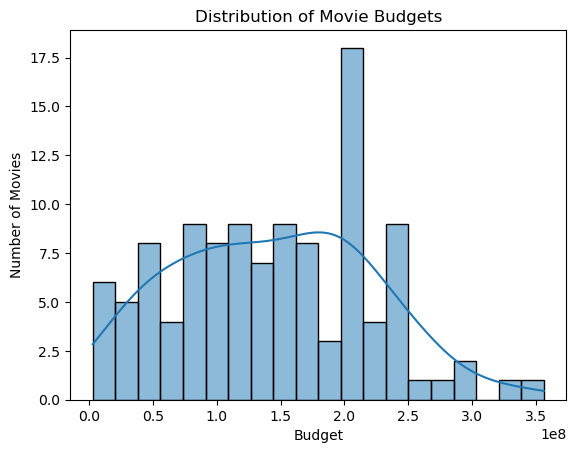

In [4]:
sns.histplot(df['Budget'], bins=20, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Number of Movies')
plt.show()

Within the histogram above, we can see the average budget for marvel and DC movies, which usually falls into the $200,000,000 range. Thus, knowing our typical budget range can determine where a filmmaker can expect to see their film when it comes to budget.

## Plot 2: Box Office Revenue vs. Rotten Tomatoes Critic Score

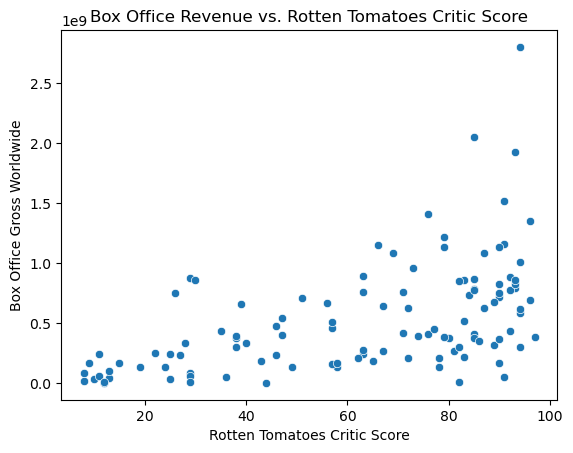

In [5]:
sns.scatterplot(x='Rotten Tomatoes Critic Score', y='Box office gross Worldwide', data=df)
plt.title('Box Office Revenue vs. Rotten Tomatoes Critic Score')
plt.xlabel('Rotten Tomatoes Critic Score')
plt.ylabel('Box Office Gross Worldwide')
plt.show()

As we can see, the usual graph for these movies is that the higher the Rotten Tomatoes Score, the graph usually has a higher gross. This is very handy in knowing that higher scores usually equate with higher revenue.

## Plot 3: Average Box Office Gross Worldwide by Distributor

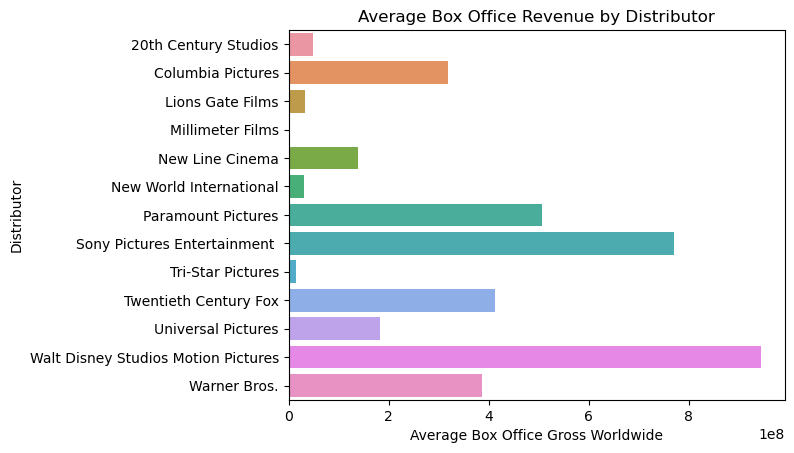

In [6]:
distributor_revenue = df.groupby('Distributor')['Box office gross Worldwide'].mean().reset_index()

sns.barplot(x='Box office gross Worldwide', y='Distributor', data=distributor_revenue)
plt.title('Average Box Office Revenue by Distributor')
plt.xlabel('Average Box Office Gross Worldwide')
plt.ylabel('Distributor')
plt.show()

Within this graph, we can see the average box office gross per distributor, which is handy in knowing how each distributor and their outcome in when it comes to revenue. This can be impactful in determining the strategies put in place by the distributors.

## Plot 4: Box Office Revenue vs. Budget

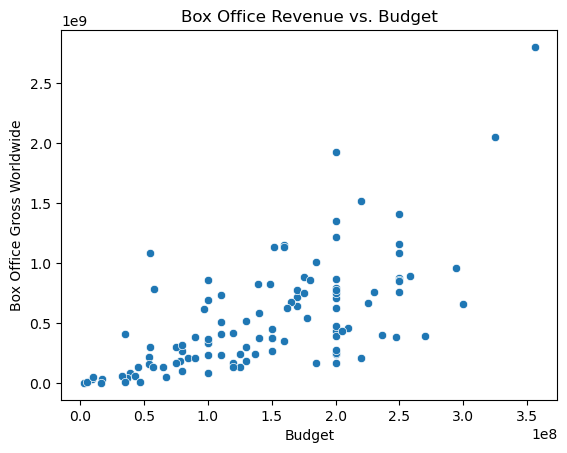

In [7]:
sns.scatterplot(x='Budget', y='Box office gross Worldwide', data=df)
plt.title('Box Office Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Box Office Gross Worldwide')
plt.show()

Within this graph, we are able to determine the budget when it comes to box office success. It indicates that the average of a higher budget usually results in higher revenue.

## Conclusion

From the graphical analysis, we can start to identify patterns and factors that contribute to the box office success of Marvel and DC movies. For example, if movies with higher budgets generally perform better, studios might consider investing more in production quality. Similarly, if certain distributors or critic scores are associated with higher box office revenues, the studios can prioritize what these elements focus upon in future projects. These insights will guide in developing a predictive model to accurately estimate the box office revenue of upcoming movies.

# Milestone 2: Data Preparation

## Step 1: Dropping Useless Features

In [8]:
columns_to_drop = [
    'Length', 'Phase', '2.5x prod', 'Character Family', 'Gross to Budget'
]

df = df.drop(columns=columns_to_drop)

Within this dataset, the four features that I have decided to drop are Phase, 2.5x prod, Character Family, and Gross to Budget. Within the dataset, these have very little use for my model, as they all have superfluous reasonings for being included.

**Length**: I have removed this as this is redundant with "Minutes" already being a category.

**Phase:** This was eliminated because, although important when it comes to understanding when this movie was released and how it was included within the MCU timeline, do not have bearing on predicting the box office success.

**2.5x prod**: This is another entry that does not help with the data preparation, as it is mainly irrelevant.

**Character Family**: Although the superhero genre is mainly dominated by a few different superheros, this would be hard to use in any sort of data models as the popularity of a character cannot be predicted, it is already determined.

**Gross to Budget**: This feature is irrelevant as the success of a movie can be determined in other methods.

## Step 2: Filling Missing Values

Within this dataset, the data has been cleaned thoroughly and includes all relevant data. However, I would like to fill in missing values in Box Office Gross - other territories with 0. This is because the international gross across all data sources is combined with domestic, and the reported number within box office gross is correct worldwide.

In [9]:
df.loc[df['Film'] == 'Supergirl', 'Box office gross Other territories'] = 0

This is helpful as instead of this being treated as NaN it can now be treated as a value.

## Step 3: Add Dummy Variables

For Franchise, Male/Female-led, and Break Even, I would like to implement dummy variables.

In [10]:
df = pd.get_dummies(df, columns=['Franchise', 'Male/Female-led', 'Break Even'])

In [11]:
df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Distributor,MPAA Rating,Minutes,...,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,Franchise_DC,Franchise_Marvel,Male/Female-led_Co-starring,Male/Female-led_Female,Male/Female-led_Male,Break Even_Flop,Break Even_Success
0,Superman,12/15/1978,"$134,478,449","$166,000,000",300478449.0,55000000.0,False,Warner Bros.,PG,143.0,...,1978.0,"$1,404,237,104","$257,033,544",True,False,False,False,True,False,True
1,Superman II,06/19/1981,"$108,185,706","$108,200,000",216385706.0,54000000.0,False,Warner Bros.,PG,127.0,...,1981.0,"$725,336,273","$181,010,842",True,False,False,False,True,False,True
2,Superman III,06/17/1983,"$59,950,623","$20,300,000",80250623.0,39000000.0,False,Warner Bros.,PG,125.0,...,1983.0,"$245,506,947","$119,310,861",True,False,False,False,True,True,False
3,Supergirl,11/21/1984,"$14,296,438",0,14296438.0,35000000.0,False,Tri-Star Pictures,PG,124.0,...,1984.0,"$41,926,345","$102,642,497",True,False,False,True,False,True,False
4,Howard the Duck,08/01/1986,"$16,295,774","$21,667,000",37962774.0,37000000.0,False,Universal Pictures,PG,110.0,...,1986.0,"$37,962,774","$37,000,000",False,True,False,False,True,True,False


Adding these columns will make this easier for evaluation, as these dummies can be applied with only 2 answers per feature.

With this being completed, I believe my data has been fully prepared for evaluation in the future. We have been able to drop unneccesary features, fill missing values to make sure the data can be viewed properly, converted dummies for 3 seperate columns. We have already cleaned the data within the EDA stage, within the necessary edits that were done before, and I fully now have believe I will be able to show and build models for evaulation to complete my goal of predicting box office success. 

# Milestone 3: Model Building and Evaluation

### imports

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

### Step 1: Fixing Previous Mistakes, Per Professor

In [13]:
currency_columns = ['Inflation Adjusted Worldwide Gross', 'Inflation Adjusted Budget',  'Box office gross Other territories', 'Box office gross Domestic (U.S. and Canada )']
for col in currency_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

categorical_features = df.select_dtypes(include=['object', 'bool']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

For my remarks on milestone 2, there were some small corrections that needed to be made. I needed to convert currency columns, which included the $. I also needed to encode and fill in categorical data, which can cause issues in my code.

### Step 2: Random Forest Regressor Model

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

features = ['Budget', 'Minutes', 'Year']
target = 'Box office gross Worldwide'

X = df[features]
y = df[target]

X = X.fillna(X.median())
y = y.fillna(y.median())

# Log transformation of target variable
y_log = np.log1p(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Modeling the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest MSE: {mse}')
print(f'Random Forest R^2 Score: {r2}')

Random Forest MSE: 0.24050968532743144
Random Forest R^2 Score: 0.8356891407060458


After some trial and eror with other types of models, the one that gave me the greatest score for my selected target, Box office gross Worldwide, was the Random Forest Regressor Model. However, this needed some steps done to get to the specific score of .24 for MSE and 83% for my R^2 score. 

First, I needed to apply a log transformation to the target variable, which would give the greater chance to reduce outliers outcomes and warp the distributions. 

After this, I needed to try the polynomial features, which helped use a simpler model algorithm to help improve the model's performance. With my sample size only being around 113 records in my database, it is worth it to use polynomial features, as the major drawbacks can cause additional input variables to expand the size of the model to get to a higher score. 

After comparing this model with other models I attempted to use beforehand, this shows that the Random Forest predictions are close to the actual values, with a score of .24. Also, with 83% being a showcase on how the variance is explained within this model.

I could further optimize with this model by using Hyperparameter Tuning by using GridSearchCV, or other methods that can help continue to improve the scores that are listed above.